# InvestAI ChatBot

Welcome to the InvestAI Chatbot! This intelligent virtual assistant is designed to provide a range of financial services to help you make informed decisions about your investments and financial goals. Whether you're looking for personalized investment recommendations, risk level evaluations, portfolio overviews, or ETF recommendations, our chatbot is here to assist you every step of the way.

Through a series of interactive scenarios, this chatbot guides you in understanding the best investment options based on your goals, risk tolerance, and financial profile. It seamlessly integrates account recommendations, risk assessments, and investment performance analyses to provide a comprehensive and user-friendly experience.

Simply input your preferences and information, and the chatbot will analyze your data to offer tailored insights and suggestions. Whether you're a novice investor or an experienced trader, the InvestAI Chatbot is your reliable companion in the world of financial decisions.

Explore the diverse scenarios and make well-informed choices that align with your financial aspirations. Welcome to a smarter way of managing your investments with the InvestAI Chatbot.

# Functions Import

This section of the code involves importing the necessary functions and libraries that the InvestAI Chatbot relies on.




In [ ]:
#Setting up the environment and importing all the functions
!pip install numpy-financial
#Get expected rate of retun
from numpy_financial import rate
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set a professional theme for plots
sns.set_style("whitegrid")




# Sample Portfolios

A selection of sample user portfolios is introduced. Each portfolio includes details such as the username, associated password, portfolio name, and the symbols of assets within the portfolio.

In [ ]:
# Sample user portfolios stored in a DataFrame (with passwords)
user_portfolios_df = pd.DataFrame({
    'username': ['user1', 'user1', 'user2', 'user2', 'user3', 'user3', 'user4', 'user4', 'user5', 'user5'],
    'password': ['pass123', 'pass123', 'mypassword', 'mypassword', 'hello123', 'hello123', 'securepass', 'securepass', 'pw456', 'pw456'],
    'portfolio_name': ['Portfolio1', 'Portfolio2', 'Portfolio3', 'Portfolio4', 'Portfolio5',
                        'Portfolio6', 'Portfolio7', 'Portfolio8', 'Portfolio9', 'Portfolio10'],
    'portfolio_symbols': ['AAPL,MSFT,GOOGL', 'TSLA,AMZN,NFLX', 'AAPL,AMZN,MSFT', 'GOOGL,TSLA,MSFT',
                          'AAPL,GOOGL,NFLX', 'TSLA,AMZN,MSFT', 'AAPL,MSFT,GOOGL', 'TSLA,AMZN,NFLX',
                          'AAPL,AMZN,MSFT', 'GOOGL,TSLA,MSFT']
})

# Scenario 1: Creating an Account

For the validate investment options we check based on the investment goal the client wants. We divided the options into two groups investment plans and non-investment plan.

1.	For people that aim to build emergency funds or create a budget, we suggest them to open GIC for saving since it has good return and very low risk.
2.	For people who are buying homes, we recommend FHSA (First home savings account) due to tax break; GIC due to low risk and good return for building budget to buy a house.
3.	For people that aim to achieve financial independence, we aim to help them achieve financial sustainability, so we suggest them to open a brokerage account for stock investment; TFSA (Tax-free savings account) since it's tax free and allows people to invest in stocks and bonds.
4.	For people who would like to save up for retirement, RRSP allows people to have tax deductibles and save for retirement; TFSA (Tax-free savings account) since it's tax free and allows people to invest in stocks and bonds; GIC due to low risk and good return for building budget to buy a house.
5.	For people would like to get debt under control or improve credit score, we recommend them to consult with financial advisor.




In [ ]:
class Scen1:
    def __init__(self):
        # Initialize a set of non-investment goals
        self.non_investment_goals = {1, 5, 6, 8}

    def get_customer_info(self):
        # Gather customer demographic information
        welcome_msg = input("Please provide us with your first name: ")
        age = int(input("What is your age? "))
        residency = input("Are you a Canadian resident? (y/n): ")
        annual_income = int(input(f"Hello {welcome_msg}! In order to figure out your investment goal, please provide your annual income of the last year: "))
        return welcome_msg, age, residency, annual_income

    def validate_investment_options(self, age, residency, investment_goal):
        if age < 18 or residency.lower() != "y":
            return []

        # Check if the investment goal is a non-investment goal
        if investment_goal in self.non_investment_goals:
            # Return recommended options for non-investment goals
            if investment_goal == 1 or investment_goal == 5:
                return ["GIC"]
            else:
                return ["Consult with a financial manager."]
        else:
            valid_options = []

            # Recommend options based on specific investment goals
            if investment_goal == 2:
                valid_options.append("FHSA")
                valid_options.append("GIC")

            if investment_goal == 4:
                valid_options.append("Brokerage Account")
                valid_options.append("TFSA")
                valid_options.append("GIC")

            if investment_goal == 7:
                valid_options.append("RRSP")
                valid_options.append("TFSA")
                valid_options.append("GIC")

            return valid_options

    def run(self):
        # Greetings and gather customer information
        customer_name, customer_age, customer_residency, customer_income = self.get_customer_info()

        # Check if the customer is eligible for investment options
        if customer_age < 18 or customer_residency.lower() != "y":
            print("Sorry, you need to be at least 18 years old and a Canadian resident to open any type of account.")
        else:
            # Display investment goals
            goal = {
                1: "Build an emergency fund",
                2: "Buy a home",
                3: "Cover a child's college costs",
                4: "Achieve financial independence",
                5: "Create a budget",
                6: "Get debt under control",
                7: "Retire at 65",
                8: "Improve your credit score"
            }

            print("\nInvestment goals:")
            for key, value in goal.items():
                print(f"{key}: {value}")

            # Ask user to select an investment goal
            investment_goal = int(input("What is your investment goal? "))

            # Validate and recommend investment options
            valid_investment_options = self.validate_investment_options(customer_age, customer_residency, investment_goal)

            # Display recommended investment options
            if valid_investment_options:
                print("\nBased on your demographic information and investment goal, we recommend considering the following investment options:")
                for option in valid_investment_options:
                    print("- " + option)
                print("\nIf you need further assistance, don't hesitate to contact us on https://www.wealthsimple.com/en-ca/support.")
            else:
                print("Sorry, we couldn't find any valid investment options for your selected goal and demographic information.")


# Scenario 2: Risk Profile

In this scenario, the chatbot evaluates the user's risk profile based on a series of questions and inputs provided by the user. The process involves assessing investment risk levels, and categorizing the user's risk tolerance. By analyzing user preferences and responses, the chatbot determines a risk category that aligns with the user's comfort level and investment goals. This scenario enables users to gain insights into their risk appetite and make informed decisions regarding their investment strategies.

In [ ]:
class Scen2:
    def __init__(self):
        # Initialize attributes to store calculated rates and risk category
        self.total_score = None

    def get_input_score(self, question, options):
        # Get user input score for a question
        print(question)
        for index, option in enumerate(options):
            print(f"{index + 1}. {option}")

        while True:
            response = input("Enter your choice: ")
            if response.isdigit():
                choice = int(response)
                if 1 <= choice <= len(options):
                    return choice - 1
                else:
                    print("Please enter a valid choice.")
            else:
                print("Please enter a valid number.")

    def calculate_risk_category(self, total_score):
        # Calculate risk category based on total score
        if total_score <= 2:
            return "Extreme Low"
        elif total_score <= 5:
            return "Low"
        elif total_score <= 10:
            return "Below Average"
        elif total_score <= 15:
            return "Average"
        elif total_score <= 20:
            return "Above Average"
        else:
            return "High"

    def risk_rank(self,total_score):
        if total_score <= 2:
            return 0
        elif total_score <= 5:
            return 1
        elif total_score <= 10:
            return 2
        elif total_score <= 15:
            return 3
        elif total_score <= 20:
            return 4
        else:
            return 5

    def run(self):
        # Risk Profile Questionnaire
        questions = [
            "Question 1: How comfortable are you with the idea of taking risks?",
            "Question 2: What is your investment time horizon?",
            "Question 3: How much fluctuation in the value of your investments can you tolerate?",
            "Question 4: What is your familiarity with different investment options?",
            "Question 5: How important is it for you to preserve your initial investment?",
            "Question 6: How would you react if your investment value declines significantly in a short period?",
            "Question 7: What percentage of your investment portfolio are you willing to allocate to higher-risk assets?",
            "Question 8: How much effort are you willing to put into managing and monitoring your investments?",
            "Question 9: What is your reaction to the possibility of missing out on potentially high returns?",
            "Question 10: What is your reaction to the possibility of missing out on market gains due to a conservative approach?"
        ]

        options = [
            ["Not comfortable", "Slightly comfortable", "Moderately comfortable", "Very comfortable"],
            ["Less than 1 year", "1-5 years", "6-10 years", "More than 10 years"],
            ["Can't tolerate any loss", "Small loss is acceptable", "Moderate fluctuations are okay", "Significant fluctuations are acceptable"],
            ["No idea about investment options", "Know a bit about common investments", "Decent understanding of investment options", "Quite knowledgeable about different investments"],
            ["Preserving initial investment is crucial", "Preservation is important, some risk can be taken", "Balancing preservation and growth is important", "Growth is important, some preservation can be sacrificed"],
            ["Would panic and want to sell immediately", "Would feel uneasy but wait and watch", "Would hold steady and wait for a rebound", "Would consider buying more at a lower price"],
            ["None", "Up to 20%", "Up to 50%", "More than 50%"],
            ["Set it and forget it", "Willing to spend some time occasionally", "Willing to actively manage and adjust", "Willing to put significant effort into managing"],
            ["Very upset", "Disappointed but understand", "Okay with it", "Understand that conservative choices have trade-offs"],
            ["Regretful", "Fine with my choice", "Relieved", "Happy with my conservative approach"]
        ]

        scores = []

        # Iterate through each question and get user input score
        for i, question in enumerate(questions):
            response = self.get_input_score(question, options[i])
            scores.append(response)

        # Calculate total score and determine risk category
        total_score = sum(scores)
        risk_category = self.calculate_risk_category(total_score)

        # Display the results
        print("\nTotal Score:", total_score)
        print("Risk Category:", risk_category)
        print("Risk Rank: ",self.risk_rank(total_score))

# Scenario 3: Investment Updates

In this scenario, the chatbot offers users the ability to receive updates on their investments. Users are prompted to provide their username and password, which allows the chatbot to access their portfolios. The chatbot then presents available portfolios associated with the provided credentials. Users can select a specific portfolio and timeframe to review its performance. Additionally, users have the option to compare their selected portfolio with other ETFs, enhancing their understanding of investment trends. This scenario empowers users to stay informed about their investments and make well-informed decisions based on real-time data.


Asks the series of questions with actions in ( ):
1. Username (searches existing database for the portfolio of the user)
2. Password
3. Portfolio of choice to check (retrieves data of the how well the portfolio is doing)
4. Asks for period of to check
5. Asks if user wants to compare with other ETFs.
6. Asks user which ETFS to compare against (compares with other ETFs using Yahoo API to retrieve comparisons data).


In [ ]:
#create class Scenario 3 as alias scen3
class Scen3:

    #initialize the attributes for the parameter self
    def __init__(self):
        self.user_data = {}

    def ask_question(self, question):
      # Function to ask a question and get user's input
        answer = input(question + " ")
        return answer

    # Function to fetch portfolio data using Yahoo Finance API
    def fetch_portfolio_data(self, symbols, period):

        data = yf.download(symbols, period=period)
        return data

    def plot_portfolio_data(self, portfolio_data, comparison_data=None):
        # Function to plot portfolio data
        #takes the earliest date
        earliest_date = portfolio_data.index[0]

        #to find the differences
        portfolio_pct_change = (portfolio_data['Close'] / portfolio_data.loc[earliest_date, 'Close'] - 1) * 100
        ax = portfolio_pct_change.plot(figsize=(10, 6), label=self.user_data['portfolio_name'])

        #plots the comparison data
        if comparison_data is not None:
            comparison_pct_change = (comparison_data['Close'] / comparison_data.loc[earliest_date, 'Close'] - 1) * 100
            comparison_pct_change.plot(ax=ax, linestyle='dotted', label="Comparison ETFs")

        plt.title("Portfolio and ETFs Performance (% Change from Earliest Date)")
        plt.xlabel("Date")
        plt.ylabel("Performance (%)")
        plt.legend()
        plt.show()

    def get_user_portfolios(self):
      # Function to retrieve user portfolios based on username and password
        username = self.user_data['username']
        password = self.user_data['password']
        user_portfolio_info = user_portfolios_df[(user_portfolios_df['username'] == username) & (user_portfolios_df['password'] == password)]
        #reset index for future retrievals
        user_portfolio_info.reset_index(inplace = True)

        if user_portfolio_info.empty:
            print("Invalid username or password.")
            return None

        return user_portfolio_info

    #to run all the respective functions in sequence by calling self.function
    def run(self):

        self.user_data['username'] = self.ask_question("1. What is your username?")
        self.user_data['password'] = self.ask_question("2. What is your password?")

        user_portfolios = self.get_user_portfolios()
        if user_portfolios is None:
            return

        # Display available portfolios by iterating through all the rows of available portfolio
        print("Available portfolios:")
        for idx, row in user_portfolios.iterrows(): #for index and data (row):
            print(f"{idx + 1}. {row['portfolio_name']}") #subsets for specific column of data

        # Select a portfolio
        while True:
            portfolio_choice = int(self.ask_question("Select a portfolio (enter the number): "))
            if 1 <= portfolio_choice <= len(user_portfolios):
                break
            else:
                print("Invalid portfolio choice. Please enter a valid number.")

        selected_portfolio = user_portfolios.iloc[portfolio_choice - 1]

 # Store selected portfolio information
        self.user_data['portfolio_name'] = selected_portfolio['portfolio_name']
        self.user_data['portfolio'] = selected_portfolio['portfolio_symbols']
        self.user_data['period'] = self.ask_question("4. For which period would you like to check? (1mo/3mo/6mo/1y/5y/10y)")

        # Compare with other ETFs
        compare_choice = self.ask_question("5. Would you like to compare with other ETFs? (yes/no)")
        if compare_choice.lower() == 'yes':
            self.user_data['compare'] = True
            self.user_data['comparison_etfs'] = self.ask_question("6. Select which ETFs you would like to compare (comma-separated): ").split(',')
        else:
            self.user_data['compare'] = False

 # Extract portfolio symbols and data period
        portfolio_symbols = selected_portfolio['portfolio_symbols'].split(',')
        period_mapping = {'1mo': '1mo', '3mo': '3mo', '6mo': '6mo', '1y': '1y', '5y': '5y', '10y': '10y'}
        data_period = period_mapping.get(self.user_data['period'], '1mo')

        portfolio_data = self.fetch_portfolio_data(portfolio_symbols, data_period)

 # Fetch comparison data if needed
        comparison_data = None
        if self.user_data['compare']:
            comparison_symbols = self.user_data['comparison_etfs']
            comparison_data = self.fetch_portfolio_data(comparison_symbols, data_period)

        print("\nPortfolio Data:")
        print(portfolio_data)

        self.plot_portfolio_data(portfolio_data, comparison_data)

        print("\nThank you! Here's the information you provided:")
        for key, value in self.user_data.items():
            print(f"{key.capitalize()}: {value}")

# Scenario 4: ETFs Recommendation

In this scenario, the chatbot assists users in making informed decisions about Exchange-Traded Funds (ETFs) investments. By leveraging user risk profile from Scenario 2, the chatbot recommends ETFs that align with the user's risk tolerance and financial goals. The chatbot calculates total scores and risk categories, facilitating the selection of suitable ETFs based on the user's preferences. By presenting expected rates and offering personalized ETF suggestions, this scenario aids users in diversifying their investment portfolios and optimizing their investment strategies.

In [ ]:
class Scen4:
    def __init__(self):
        self.filtered_df = None
        self.scaler = None
        self.normalized_customer_risk = None
        self.recommended_ETFs = None
        self.recommendations = None


    def financial_calculator(self, n, pmt, pv, fv):
        """Calculate and categorize the required rate of return."""
        from numpy_financial import rate
        import numpy_financial as npf

        rate_month = npf.rate(n, -pmt, -pv, fv) * 100
        rate_year = rate_month * 12

        required_rate_categories = [
            (5, "Very Low"),
            (15, "Low"),
            (25, "Average"),
            (35, "High"),
            (float("inf"), "Very High")
        ]

        required_rate = next(category for threshold, category in required_rate_categories if rate_year <= threshold)

        print("Your expected required rate per month:", round(rate_month, 2), "%")
        print("Your annual expected required rate:", round(rate_year, 2), "%")

        return rate_year

    def gather_etf_data(self):
        """Gather ETF data from an external source."""
        excel_link = "https://onedrive.live.com/download.aspx?resid=6D3E3096AADFA7E5!20284&ithint=file%2cxlsx&wdo=2&authkey=!AJTF8o5Do8iIE8I"
        df = pd.read_excel(excel_link, sheet_name="etf", engine="openpyxl")

        etfs_df = df["Symbol"]
        etfs_list = []
        returns_list = []

        for etf in etfs_df:
            #Fetch historical data using Yahoo Finance API
            ticker = yf.Ticker(etf)
            hist = ticker.history(period="5y")

            if not hist.empty:
                close_now = hist["Close"].iloc[-1]
                close_5y = hist["Close"].iloc[0]

                #calculate annual return
                annual_return = ((close_now / close_5y) ** (1 / 5)) - 1
                annual_return = annual_return * 100

                etfs_list.append(etf)
                returns_list.append(annual_return)
            else:
                etfs_list.append(etf)
                returns_list.append(None)

        #create DataFrame with ETF symbols and annual returns
        returns_df = pd.DataFrame({"Symbol": etfs_list, "Annual_Return": returns_list}).astype(
            {"Annual_Return": float}
        )

        #merge ETF data with annual returns
        merged_df = df.merge(returns_df, on="Symbol", how="left")
        merged_df.drop(["Returns", "Name"], axis=1, inplace=True)

        #map risk_mapping to numeric scale
        risk_mapping = {
            "low": 1,
            "below average": 2,
            "average": 3,
            "above average": 4,
            "high": 5
        }
        merged_df["Morningstar Risk "] = merged_df["Morningstar Risk "].str.lower().map(risk_mapping)

        return merged_df

    def recommend_etfs(self, merged_df, rate_year, risk_rank):
        """Recommend ETFs based on rate_year and risk_rank."""
        required_return = rate_year

        # Filter out ETFs with risk profile greater than or equal to customer's risk rank
        self.filtered_df = merged_df[merged_df["Morningstar Risk "] >= risk_rank]

        # Check if there are ETFs left after filtering by risk rank
        if self.filtered_df.empty:
            print("No ETFs meet the risk profile criteria.")
            return

        # Normalize risk values using Min-Max scaling
        self.scaler = MinMaxScaler()
        normalized_risk = self.scaler.fit_transform(self.filtered_df[["Morningstar Risk "]])

        # Normalize the customer's risk profile
        self.normalized_customer_risk = self.scaler.transform([[risk_rank]])

        n_neighbors = 3
        nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm="auto").fit(normalized_risk)
        _, indices = nbrs.kneighbors(self.normalized_customer_risk)

        recommended_etfs = self.filtered_df.iloc[indices[0]]
        recommendations = recommended_etfs[recommended_etfs['Annual_Return'] >= rate_year]

        if recommendations.empty == True:
            print("\nNo ETFs recommended for your level of risk and/or returns. \nPlease revise your inputs or speak to a financial advisor for more details.")

        else:
            recommendations.sort_values("Annual_Return",ascending = False,inplace=True) #sort by descending order
            print("\nRecommended ETFs:")
            print(recommendations.to_string(index=False)) #to remove the index when printing DataFrame

        return recommendations

    def plot_recommendations(self, recommendations):
        """Plot the historical performance of recommended ETFs."""
        if recommendations is None or recommendations.empty:
            return

        plt.figure(figsize=(12, 6))

        #plot each ETF using closing data from Yahoo API for the past 5 years
        for symbol in recommendations['Symbol']:
            etf_data = yf.download(symbol, period="5y", progress=False)
            performance_ratio = (etf_data['Close'] / etf_data['Close'].iloc[0])*100  # Calculate performance ratio
            plt.plot(etf_data.index, performance_ratio, label=symbol)

        plt.xlabel('Date')
        plt.ylabel('ETF Performance (%)')
        plt.title('Recommended ETFs Historical Performance over the past 5 years')
        plt.legend()
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def run(self):
        n = int(input("How long is your investment horizon? (in terms of months) "))
        pv = float(input("How much money do you want to put in your account on day 1? "))
        pmt = float(input("How much money do you want to put in per month? (could be $0) "))
        fv = float(input("How much money do you want to make after your investment horizon? "))

        risk_rank = int(input("\nWhat was your risk ranking (1/2/3/4/5)? "))

        rate_year = self.financial_calculator(n, pmt, pv, fv)

        print(f"\nLooking for ETFs Recommendations with annual returns of {rate_year:.2f}% with risk ranking of {risk_rank}...")

        merged_df = self.gather_etf_data()
        recommendations = self.recommend_etfs(merged_df, rate_year, risk_rank)

        self.plot_recommendations(recommendations)

# Integration of Codes

This section of the code integrates the various scenarios of the InvestAI Chatbot into a seamless user experience. Users are presented with a menu of scenarios to choose from, including account type recommendation, risk level evaluation, profile overview, ETF recommendation, and the option to exit the chatbot. The code handles user inputs, ensuring that valid options are selected and executed.

Hello! Welcome to InvestAI chatbot.

        What service would you like us to provide today:
        Account type recommendation: 1
        Risk level evaluation: 2
        Your Profile overview: 3
        ETF Recommendation: 4
        Exit: 0
        4
How long is your investment horizon? (in terms of months) 60
How much money do you want to put in your account on day 1? 10000
How much money do you want to put in per month? (could be $0) 500
How much money do you want to make after your investment horizon? 48000

What was your risk ranking (1/2/3/4/5)? 3
Your expected required rate per month: 0.48 %
Your annual expected required rate: 5.76 %

Looking for ETFs Recommendations with annual returns of 5.76% with risk ranking of 3...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Recommended ETFs:
Symbol  Morningstar Risk   Annual_Return
  VONG                3.0      13.530331
  IUSV                3.0       9.023083
  ACWI                3.0       7.315667


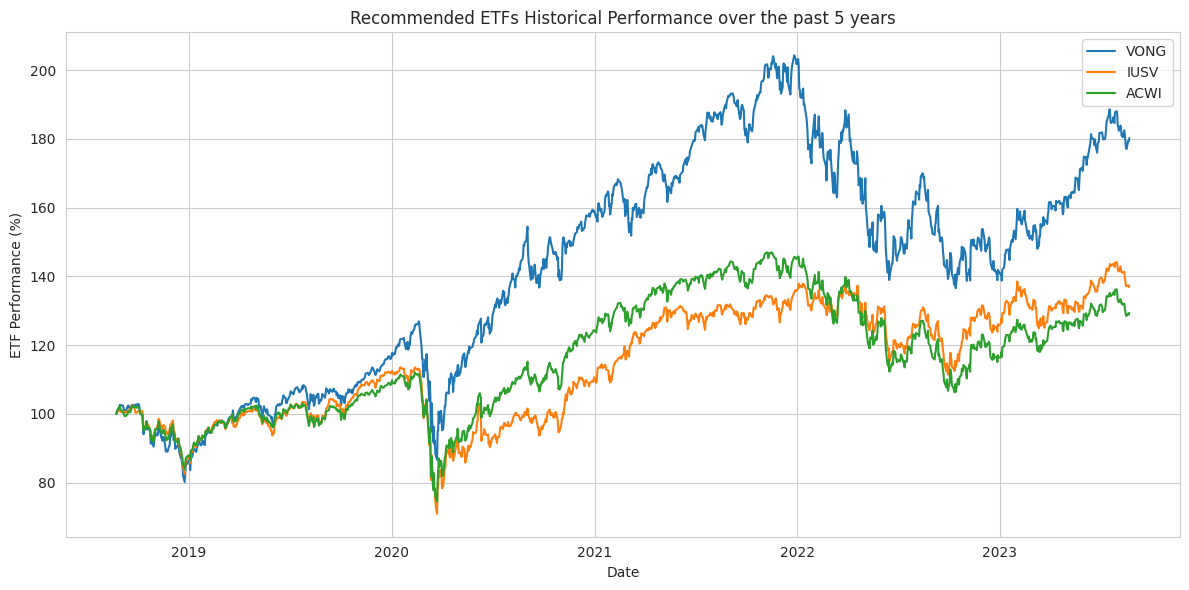

KeyboardInterrupt: ignored

In [ ]:
print("Hello! Welcome to InvestAI chatbot.")

while True:
    try:
        scenario = int(input("""
        What service would you like us to provide today:
        Account type recommendation: 1
        Risk level evaluation: 2
        Your Profile overview: 3
        ETF Recommendation: 4
        Exit: 0
        """))  # Convert input to integer

        if scenario == 0:
            print("Exiting chatbot.")
            break  # Exit the loop
        elif scenario in [1, 2, 3, 4]:
            if scenario == 1:
                chatbot = Scen1()
            elif scenario == 2:
                chatbot = Scen2()
            elif scenario == 3:
                chatbot = Scen3()
            elif scenario == 4:
                chatbot = Scen4()
            chatbot.run()
        else:
            print("Invalid scenario. Please select a valid scenario (1, 2, 3, 4) or type 0 to exit.")

        #stop = input("\n Do you want to continue to talk to InvestAI?(Y/N)")
        #if stop == "N" or "n" or "no" or "No":
          #print("\n Thank you for using InvestAI service! contact us on https://www.wealthsimple.com/en-ca/support.")
          #break


    except ValueError:
        print("Invalid input. Please enter a valid number.")
